In [78]:
# import library

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os
import pickle

In [79]:
#data directory
DATA_DIR=os.path.join("..","BCG case")
TRAINING_DATA=os.path.join(DATA_DIR,"ml_case_training_data.csv")
HISTORY_DATA=os.path.join(DATA_DIR,"ml_case_training_hist_data.csv")
CHURN_DATA=os.path.join(DATA_DIR,"ml_case_training_output.csv")

In [2]:
#import data

train_data = pd.read_csv('ml_case_training_data.csv')
hist_data = pd.read_csv('ml_case_training_hist_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')

In [3]:
#check the data

train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
#combine train data and churn data

train = pd.merge(train_data, churn_data, on = 'id')
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [7]:
#check the data type

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [8]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
#dataframe stat
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


Negative value on min value, maybe a customer has refund, have to confirm with client. 

In [10]:
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Negative value on min value, maybe a customer has refund, have to confirm with client. 

In [11]:
#check the missing % of train data

pd.DataFrame({'Missing %': train.isnull().sum()/len(train.index)*100})

,Missing %
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


'campaign_disc_ele' has 100% missing value and some of the columns has more than 75% value missing. We may have to remove them.

In [12]:
#check the missing % of hist data

pd.DataFrame({'Missing %': hist_data.isnull().sum()/len(hist_data.index)*100})

,Missing %
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


All columns have less than 1% missing value, we may drop the null value later.

In [13]:
#Data Visualization

In [14]:
#churn rate
churn = train[['id', 'churn']]

In [15]:
churn.astype({'churn': 'str'}).dtypes

id       object
churn    object
dtype: object

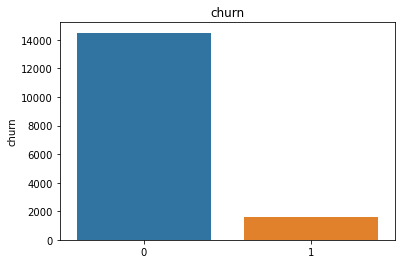

In [16]:
sns.barplot(churn['churn'].value_counts().index, churn['churn'].value_counts()).set_title('churn')
plt.show()

In [17]:
churn['churn'].value_counts()

0    14501
1     1595
Name: churn, dtype: int64

In [18]:
1595/(14501+1595)*100

9.909294234592446

Around 9.9% churn rate of the client, have to confirm with client.

#SME activity

company's activities and sales chanel may be important to churn rate.

In [19]:
activity = train[['id', 'activity_new', 'churn']]

In [20]:
activity = activity.groupby([activity['activity_new'], 
                             activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0], ascending = False )

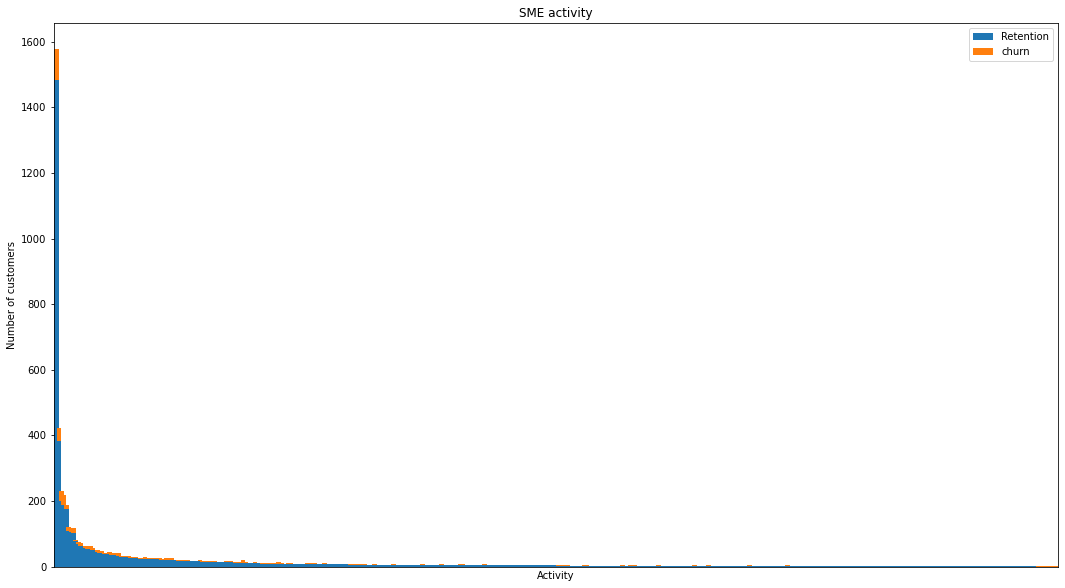

In [21]:
activity.plot(kind='bar',
             figsize=(18,10),
             width=2,
             stacked=True,
             title='SME activity')
#labels
plt.ylabel('Number of customers')
plt.xlabel('Activity')
#Rename legend
plt.legend(['Retention', 'churn'], loc='upper right')
#remove the label for the xticks as the categories are encoded and we can't draw any meaning from it yet
plt.xticks([])
plt.show()

#Though the activity data only has around 60% missing value, 
but the churn rate looks like not specific relatd to certain activity.

In [25]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({'Percentage churn': activity_percentage,
             'Total customers': activity_total}).sort_values(by = 'Percentage churn',
                                                            ascending=False).head(10)

,Percentage churn,Total customers
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


In [ ]:
# 8 activities lead to 9 customers churn. Comparing to more than 16k customers, churn is not specific related to activity.

In [27]:
#sales channel
channel = train[['id', 'channel_sales', 'churn']]

In [29]:
channel = channel.groupby([channel['channel_sales'],
                         channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [30]:
channel_churn = (channel.div(channel.sum(axis=1), axis =0)*100).sort_values(by =[1],
                                                                           ascending = False)

In [42]:
def plot_stacked_bars(dataframe, title_, size_ = (18,10), rot_=0, legend_ = 'upper right'):
    
    ax = dataframe.plot(kind='bar',
                       stacked = True,
                       figsize = size_,
                       rot=rot_,
                       title=title_)
    
    annotate_stacked_bars(ax, textsize=14)
    
    plt.legend(['retention', 'churn'], loc=legend_)
    
    plt.ylabel('customer base(%)')
    plt.show
    
def annotate_stacked_bars(ax, pad =0.99, colour = 'white', textsize=13):
    
    for p in ax.patches:
        
        value = str(round(p.get_height(), 1))
        
        if value == '0.0':
            continue
        ax.annotate(value,
                   ((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                   color=colour,
                   size=textsize,
                   )

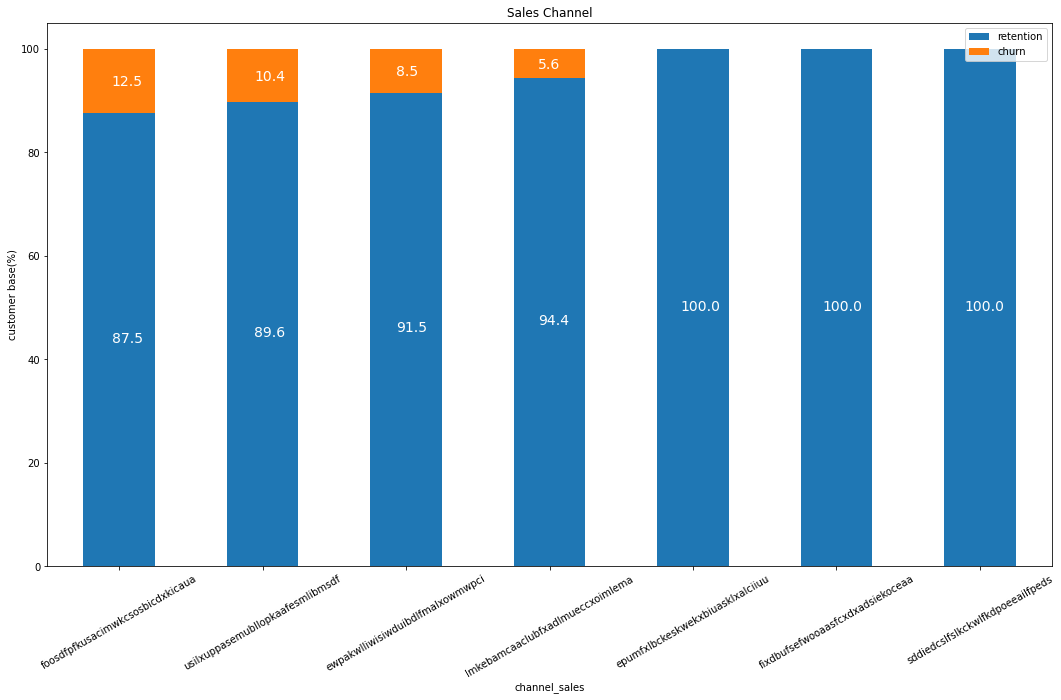

In [43]:
plot_stacked_bars(channel_churn, 'Sales Channel', rot_=30)

In [44]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({'Percentage churn': channel_percentage,
             'Total customers': channel_total}).sort_values(by = 'Percentage churn',
                                                            ascending=False).head(10)

,Percentage churn,Total customers
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [45]:
#dates

dates = train[['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']].copy()

In [47]:
#transform date column to datetime type
dates['date_activ']= pd.to_datetime(dates['date_activ'], format = '%Y-%m-%d')
dates['date_end']= pd.to_datetime(dates['date_end'], format = '%Y-%m-%d')
dates['date_modif_prod']= pd.to_datetime(dates['date_modif_prod'], format = '%Y-%m-%d')
dates['date_renewal']= pd.to_datetime(dates['date_renewal'], format = '%Y-%m-%d')

In [50]:
def plot_dates(dataframe,column,fontsize_=12):

    # Group by month
    temp=dataframe[[column,
                    "churn",
                    "id"]].set_index(column).groupby([pd.Grouper(freq='M'),"churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar",
                 stacked=True,
                 figsize=(18,10),
                 rot=0)

    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x:line_format(x),temp.index))

    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention","Churn"],loc="upper right")
    plt.show()

def line_format(label):

    month=label.month_name()[:1]
    if label.month_name()=="January":
        month += f'\n{label.year}'
    return month

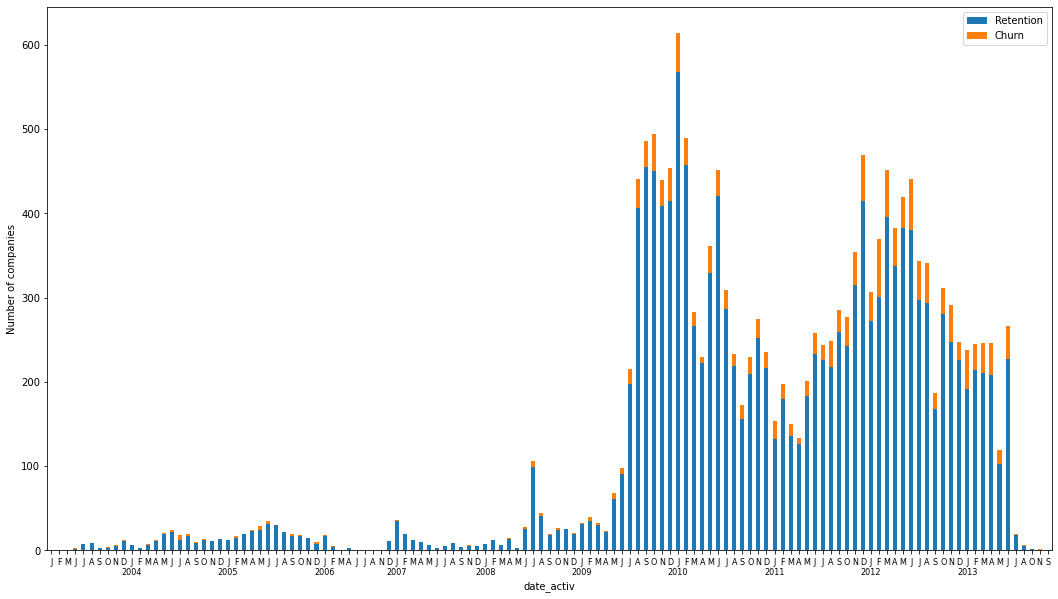

In [51]:
plot_dates(dates, 'date_activ', fontsize_ =8)

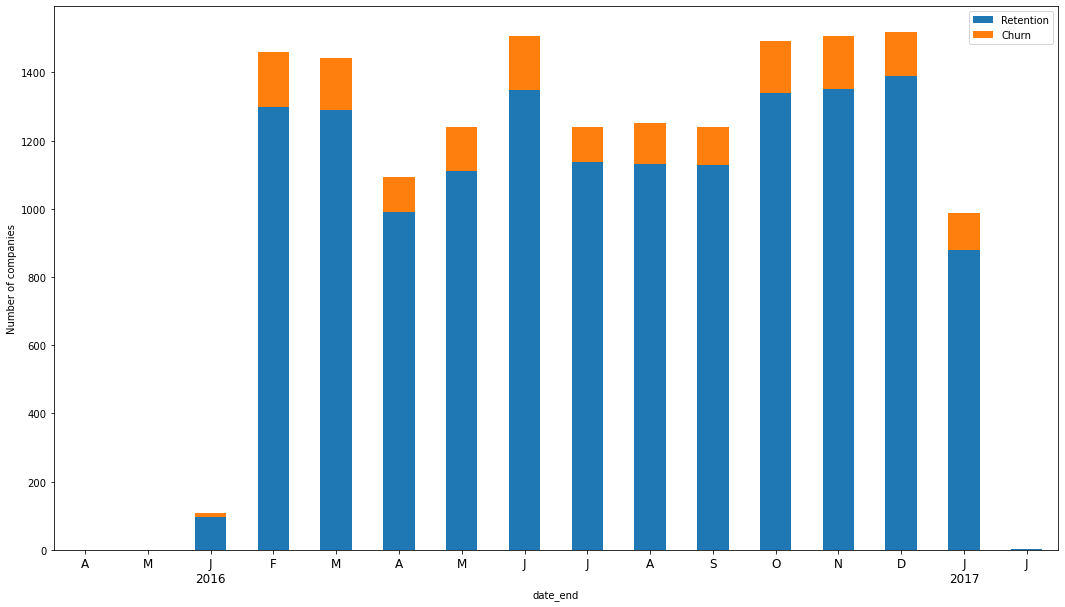

In [52]:
plot_dates(dates,"date_end")

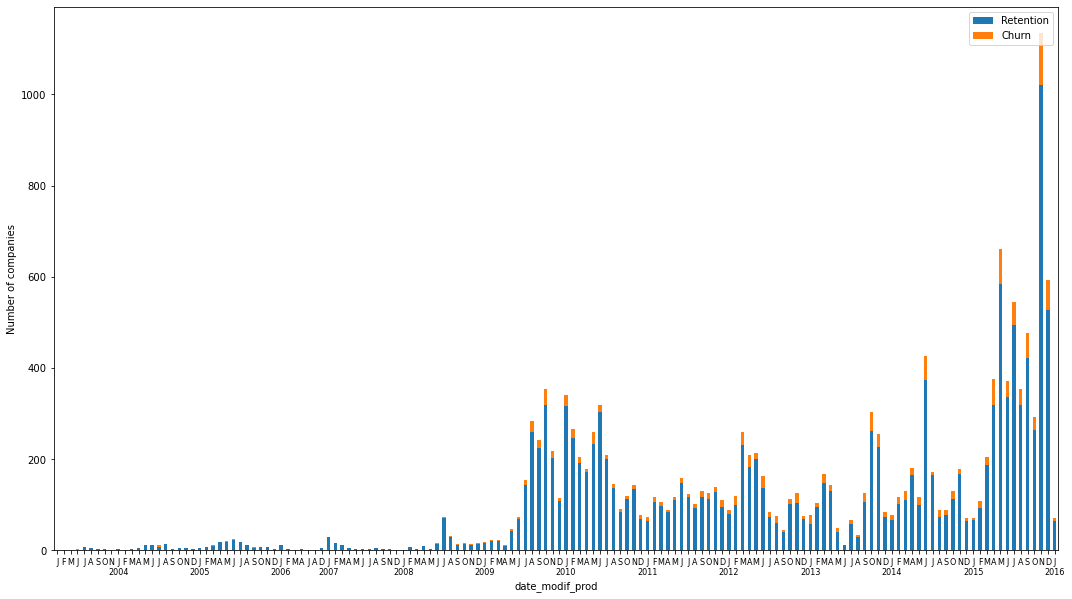

In [54]:
plot_dates(dates,"date_modif_prod",fontsize_=8)

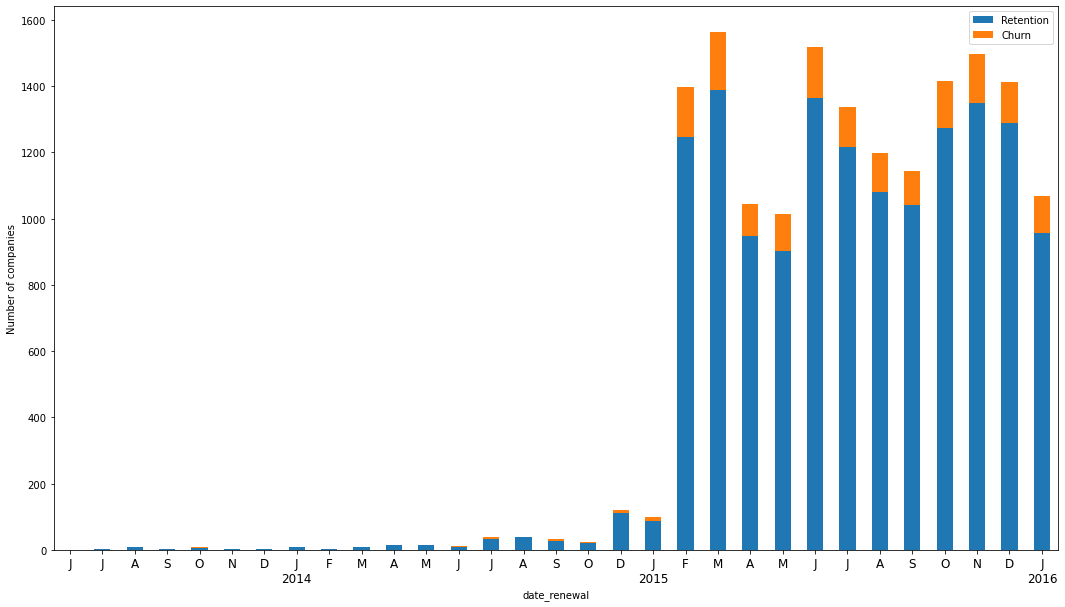

In [53]:
plot_dates(dates,"date_renewal")

In [ ]:
# we don't see certian dates specific related to churn.

In [55]:
#data cleaning
#missing date
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [56]:
#check the missing % of train data

pd.DataFrame({'Missing %': train.isnull().sum()/len(train.index)*100})

,Missing %
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [60]:
# we will remove the variables with more than 75% of the value missing
train.drop(columns = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                     'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'], inplace = True)

In [62]:
for col in train.columns:
    print(col)

id
activity_new
channel_sales
cons_12m
cons_gas_12m
cons_last_month
date_activ
date_end
date_modif_prod
date_renewal
forecast_cons_12m
forecast_cons_year
forecast_discount_energy
forecast_meter_rent_12m
forecast_price_energy_p1
forecast_price_energy_p2
forecast_price_pow_p1
has_gas
imp_cons
margin_gross_pow_ele
margin_net_pow_ele
nb_prod_act
net_margin
num_years_antig
origin_up
pow_max
churn


In [63]:
#check duplicated rows
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [ ]:
#Format data

In [68]:
train.loc[train["date_modif_prod"].isnull(), 'date_modif_prod'] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(), 'date_end'] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(), 'date_renewal'] = train["date_renewal"].value_counts().index[0]

In [ ]:
#Fill missing data

In [69]:
pd.DataFrame({'Missing %': hist_data.isnull().sum()/len(hist_data.index)*100})

,Missing %
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In [72]:
#fill missing data in hist dataset

hist_data.loc[hist_data["price_p1_var"].isnull(),"price_p1_var"]=hist_data["price_p1_var"].median()
hist_data.loc[hist_data["price_p2_var"].isnull(),"price_p2_var"]=hist_data["price_p2_var"].median()
hist_data.loc[hist_data["price_p3_var"].isnull(),"price_p3_var"]=hist_data["price_p3_var"].median()
hist_data.loc[hist_data["price_p1_fix"].isnull(),"price_p1_fix"]=hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"].isnull(),"price_p2_fix"]=hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"].isnull(),"price_p3_fix"]=hist_data["price_p3_fix"].median()

In [73]:
#Format train data
train['date_activ']= pd.to_datetime(train['date_activ'], format = '%Y-%m-%d')
train['date_end']= pd.to_datetime(train['date_end'], format = '%Y-%m-%d')
train['date_modif_prod']= pd.to_datetime(train['date_modif_prod'], format = '%Y-%m-%d')
train['date_renewal']= pd.to_datetime(train['date_renewal'], format = '%Y-%m-%d')

In [ ]:
#Format hist data
hist_data['price_date']= pd.to_datetime(hist_data['price_date'], format = '%Y-%m-%d')

In [76]:
#fix hist negative data
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [77]:
hist_data.loc[hist_data["price_p1_fix"]<0,"price_p1_fix"]=hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"]<0,"price_p2_fix"]=hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"]<0,"price_p3_fix"]=hist_data["price_p3_fix"].median()

In [ ]:
#pickling, Make directoryprocessed_dataif it does not exist already

In [80]:
if not os.path.exists(os.path.join("..","processed_data")):
    os.makedirs(os.path.join("..","processed_data"))

In [81]:
PICKLE_TRAIN_DIR=os.path.join("..","processed_data","train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join("..","processed_data","history_data.pkl")

In [83]:
pd.to_pickle(train,PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data,PICKLE_HISTORY_DIR)